In [3]:
import numpy as np
import pandas as pd
from catboost import CatBoostRegressor
from catboost import CatBoostClassifier
import sklearn
import pickle
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import warnings
import seaborn as sns
from sklearn.utils import shuffle
import yfinance as yf
from datetime import datetime, timedelta

In [9]:
start_date = (datetime.now() - timedelta(days=8)).strftime('%Y-%m-%d')
end_date = (datetime.now()- timedelta(days=0)).strftime('%Y-%m-%d')

asset1_symbol = 'BTC-USD'
asset2_symbol = 'ETH-USD'
asset3_symbol = 'SOL-USD'
asset4_symbol = 'ADA-USD'
asset5_symbol = 'TON-USD'
asset6_symbol = 'XRP-USD'
asset7_symbol = 'TRX-USD'
asset8_symbol = 'DOGE-USD'
asset1_data = yf.download(asset1_symbol, start=start_date, end=end_date, interval = "1m")
asset2_data = yf.download(asset2_symbol, start=start_date, end=end_date, interval = "1m")
asset3_data = yf.download(asset3_symbol, start=start_date, end=end_date, interval = "1m")
asset4_data = yf.download(asset4_symbol, start=start_date, end=end_date, interval = "1m")
asset5_data = yf.download(asset5_symbol, start=start_date, end=end_date, interval = "1m")
asset6_data = yf.download(asset6_symbol, start=start_date, end=end_date, interval = "1m")
asset7_data = yf.download(asset7_symbol, start=start_date, end=end_date, interval = "1m")
asset8_data = yf.download(asset8_symbol, start=start_date, end=end_date, interval = "1m")
asset = {
    1: asset1_data,
    2: asset2_data,
    3: asset3_data,
    4: asset4_data,
    5: asset5_data,
    6: asset6_data,
    7: asset7_data,
    8: asset8_data
}

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [11]:
name = "TRX"
num = 7
asset_data = asset[num]
df1 = pd.DataFrame({
    'close': asset_data[('Close', f'{name}-USD')],
    'low': asset_data[('Low', f'{name}-USD')],
    'high': asset_data[('High', f'{name}-USD')],
    'open' : asset_data[('Open', f'{name}-USD')]
}).dropna()

name = "XRP"
num = 6
asset_data = asset[num]
df2 = pd.DataFrame({
    'close': asset_data[('Close', f'{name}-USD')],
    'low': asset_data[('Low', f'{name}-USD')],
    'high': asset_data[('High', f'{name}-USD')],
    'open' : asset_data[('Open', f'{name}-USD')]
}).dropna()

name = "TON"
num = 5
asset_data = asset[num]
df3 = pd.DataFrame({
    'close': asset_data[('Close', f'{name}-USD')],
    'low': asset_data[('Low', f'{name}-USD')],
    'high': asset_data[('High', f'{name}-USD')],
    'open' : asset_data[('Open', f'{name}-USD')]
}).dropna()

name = "ADA"
num = 4
asset_data = asset[num]
df4 = pd.DataFrame({
    'close': asset_data[('Close', f'{name}-USD')],
    'low': asset_data[('Low', f'{name}-USD')],
    'high': asset_data[('High', f'{name}-USD')],
    'open' : asset_data[('Open', f'{name}-USD')]
}).dropna()

name = "SOL"
num = 3
asset_data = asset[num]
df5 = pd.DataFrame({
    'close': asset_data[('Close', f'{name}-USD')],
    'low': asset_data[('Low', f'{name}-USD')],
    'high': asset_data[('High', f'{name}-USD')],
    'open' : asset_data[('Open', f'{name}-USD')]
}).dropna()

name = "DOGE"
num = 8
asset_data = asset[num]
df6 = pd.DataFrame({
    'close': asset_data[('Close', f'{name}-USD')],
    'low': asset_data[('Low', f'{name}-USD')],
    'high': asset_data[('High', f'{name}-USD')],
    'open' : asset_data[('Open', f'{name}-USD')]
}).dropna()

In [12]:
df = pd.concat([df4], axis=0)
df

,close,low,high,open
Datetime,,,,
2025-05-20 00:00:00+00:00,0.743046,0.743046,0.743046,0.743046
2025-05-20 00:02:00+00:00,0.743058,0.743058,0.743058,0.743058
2025-05-20 00:03:00+00:00,0.743085,0.743085,0.743085,0.743085
2025-05-20 00:04:00+00:00,0.743324,0.743324,0.743324,0.743324
2025-05-20 00:05:00+00:00,0.743398,0.743398,0.743398,0.743398
...,...,...,...,...
2025-05-27 21:27:00+00:00,0.763781,0.763781,0.763781,0.763781
2025-05-27 21:28:00+00:00,0.763325,0.763325,0.763325,0.763325
2025-05-27 21:29:00+00:00,0.763173,0.763173,0.763173,0.763173


In [13]:
df.index = range(df.shape[0])

In [14]:
df = df.astype(dtype=np.float64)

In [15]:
warnings.filterwarnings("ignore")

In [16]:
# df = pd.read_csv(r"Desktop/algo/datasets/BTCUSDT_raw.csv", sep='|')
# df.columns = ['unix','open', 'high', 'low', 'close', 'volume ETH', '1', '2', 'volume usd', 'tradecount']
# df = df.drop(columns=['unix', '1', '2', 'tradecount'])

In [17]:
df = df[["close", "open", "low", "high"]]

In [18]:
df_copy = df[:100000]
df_copy = df_copy[["close","low", "high", "open"]]
prices_col = ["close", "low", "high", "open"]

In [19]:
data = pd.DataFrame((df_copy[prices_col].values[1:])/(df_copy[prices_col].values[0:-1]), columns=prices_col, index=range(1,df_copy.shape[0]))
print(data.shape)
#data["tradecount"] = df_copy["tradecount"].iloc[1:]
data.index = range(0,data.shape[0])

(10469, 4)


In [20]:
(data["close"] > 1).mean()

np.float64(0.5087400897889006)

In [21]:
(abs(data["close"] - 1) == 0).mean()

np.float64(0.001528321711720317)

In [22]:
data["close_copy"] = data["close"].copy()
data["mean_ch"] = data["close_copy"].rolling(window=80).apply(np.prod, raw=True) - data["close"]
data["mean_ch_half"] = data["close_copy"].rolling(window=40).apply(np.prod, raw=True) - data["close"]
data["mean_ch_quater"] = data["close_copy"].rolling(window=20).apply(np.prod, raw=True) - data["close"]
data["mean_ch_eighth"] = data["close_copy"].rolling(window=10).apply(np.prod, raw=True) - data["close"]

data["sum"] =data["close_copy"].rolling(window=80).apply(np.prod, raw=True)
data["sum_half"] = data["close_copy"].rolling(window=40).apply(np.prod, raw=True)
data["sum_quater"] = data["close_copy"].rolling(window=20).apply(np.prod, raw=True)
data["sum_eighth"] = data["close_copy"].rolling(window=10).apply(np.prod, raw=True)
data["sum_16th"] = data["close_copy"].rolling(window=5).apply(np.prod, raw=True)

data["st_dev"] = data["close_copy"].rolling(window=80).apply(np.std, raw=True)
data["st_dev_half"] = data["close_copy"].rolling(window=40).apply(np.std, raw=True)
data["st_dev_quater"] = data["close_copy"].rolling(window=20).apply(np.std, raw=True)
data["st_dev_eighth"] = data["close_copy"].rolling(window=10).apply(np.std, raw=True)
data["st_dev_16th"] = data["close_copy"].rolling(window=5).apply(np.std, raw=True)

data["min"] = data["close_copy"].rolling(window=80).min()
data["min_half"] = data["close_copy"].rolling(window=40).min()
data["min_quater"] = data["close_copy"].rolling(window=20).min()
data["min_eighth"] = data["close_copy"].rolling(window=10).min()
data["min_16th"] = data["close_copy"].rolling(window=5).min()

data["max"] = data["close_copy"].rolling(window=80).max()
data["max_half"] = data["close_copy"].rolling(window=40).max()
data["max_quater"] = data["close_copy"].rolling(window=20).max()
data["max_eighth"] = data["close_copy"].rolling(window=10).max()
data["max_16th"] = data["close_copy"].rolling(window=5).max()

data["skew"] = data["close_copy"].rolling(window=80).skew()
data["skew_half"] = data["close_copy"].rolling(window=40).skew()
data["skew_quater"] = data["close_copy"].rolling(window=20).skew()
data["skew_eighth"] = data["close_copy"].rolling(window=10).skew()

data["cov"] = data["close_copy"].rolling(window=80).cov()
data["cov_half"] = data["close_copy"].rolling(window=40).cov()
data["cov_quater"] = data["close_copy"].rolling(window=20).cov()
data["cov_eighth"] = data["close_copy"].rolling(window=10).cov()

data["median"] = data["close_copy"].rolling(window=80).median()
data["median_half"] = data["close_copy"].rolling(window=40).median()
data["median_quater"] = data["close_copy"].rolling(window=20).median()
data["median_eighth"] = data["close_copy"].rolling(window=10).median()
data["median_16th"] = data["close_copy"].rolling(window=5).median()

data = data.dropna()

In [23]:
data

,close,low,high,open,close_copy,mean_ch,mean_ch_half,mean_ch_quater,mean_ch_eighth,sum,...,skew_eighth,cov,cov_half,cov_quater,cov_eighth,median,median_half,median_quater,median_eighth,median_16th
79,0.999968,0.999968,0.999968,0.999968,0.999968,0.002927,0.001520,0.002590,0.002855,1.002895,...,1.447459,5.131293e-07,3.352430e-07,3.760414e-07,3.115276e-07,1.000025,0.999983,0.999965,0.999993,0.999968
80,1.000192,1.000192,1.000192,1.000192,1.000192,0.002879,0.001624,0.002296,0.002882,1.003071,...,1.401425,5.134270e-07,3.350216e-07,3.753024e-07,2.988495e-07,1.000026,1.000009,0.999965,1.000055,1.000092
81,1.000083,1.000083,1.000083,1.000083,1.000083,0.003036,0.002100,0.002377,0.003245,1.003119,...,1.470791,5.134517e-07,3.322012e-07,3.753795e-07,2.783710e-07,1.000026,1.000022,0.999965,1.000088,1.000083
82,0.999982,0.999982,0.999982,0.999982,0.999982,0.002795,0.003743,0.000966,0.003310,1.002777,...,1.464318,5.124598e-07,2.644267e-07,2.716097e-07,2.810592e-07,1.000025,1.000022,0.999965,1.000088,0.999982
83,1.000422,1.000422,1.000422,1.000422,1.000422,0.002679,0.003893,0.001040,0.002802,1.003101,...,1.525064,5.142841e-07,2.652590e-07,2.772632e-07,2.790870e-07,1.000025,1.000036,0.999975,1.000088,1.000083
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10464,0.999900,0.999900,0.999900,0.999900,0.999900,-0.000358,-0.002223,-0.001879,-0.002276,0.999543,...,-2.747243,7.573187e-08,9.624235e-08,1.361001e-07,2.070469e-07,0.999998,0.999975,0.999948,0.999931,0.999919
10465,0.999402,0.999402,0.999402,0.999402,0.999402,-0.000501,-0.002336,-0.001929,-0.002409,0.998902,...,-2.288578,8.007029e-08,1.033268e-07,1.482553e-07,2.087379e-07,0.999995,0.999962,0.999944,0.999910,0.999900
10466,0.999801,0.999801,0.999801,0.999801,0.999801,-0.001119,-0.002260,-0.002425,-0.002702,0.998683,...,-2.357065,8.048154e-08,9.430893e-08,1.484736e-07,2.097712e-07,0.999987,0.999962,0.999944,0.999910,0.999801
10467,0.999901,0.999901,0.999901,0.999901,0.999901,-0.001567,-0.002453,-0.002620,-0.002844,0.998334,...,-2.365238,7.964669e-08,9.426013e-08,1.476529e-07,2.077285e-07,0.999979,0.999952,0.999938,0.999901,0.999900


In [24]:
def fol_make(arr):
    res = 0
    for i in range(3,len(arr)):
        res += np.prod(arr[:i+1])
    return res/(len(arr)-3)

In [25]:
def prices_make(arr, all_prices):
    all_prices.append(arr)
    return None

In [26]:
def make_data(data, n=10, pred=5):
    y = (data["close"]).rolling(window=pred).apply(np.prod).shift(-pred)[n-1:-pred].values
    # (data["close"]).rolling(window=pred).apply(lambda s: prices_make(s, copy_of_prices)).shift(-pred)[n-1:-pred].values
    X = data[n-1:-pred]
    for i in range(1,n):
        X = pd.concat([X,data["close"].shift(i).rename(f"close_{i}")[n-1:-pred]], axis = 1)
    features_names = X.columns
    return X,y-1,features_names

In [27]:
X, y, features_names = make_data(data)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, shuffle=False, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train, test_size=0.2, shuffle=False, random_state=42)

In [28]:
X_train.shape, X_val.shape, X_test.shape

((6640, 51), (1660, 51), (2076, 51))

In [29]:
def train_reg(X,y,features_names):
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, shuffle=False, random_state=42)
    X_train, X_val, y_train, y_val = train_test_split(X_train,y_train, test_size=0.2, shuffle=False, random_state=42)
    boost = CatBoostRegressor(loss_function="MAE", random_strength=3.0, early_stopping_rounds=30,iterations=1000, use_best_model=True, score_function="L2", grow_policy="Lossguide", l2_leaf_reg=2, min_data_in_leaf=10)
    boost.fit(X_train, y_train, eval_set=(X_val, y_val))
    boost.set_feature_names(features_names)
    pred = boost.predict(X_val)
    p,q = 0, 10
    print((np.sign(pred.reshape(-1)[(abs(pred)>p) & (abs(pred) < q)]) == np.sign(y_val.reshape(-1)[(abs(pred)>p) & (abs(pred) < q)])).mean())
    print("Long wr:", (np.sign(pred.reshape(-1)[((pred)>p) & ((pred) < q)]) == np.sign(y_val.reshape(-1)[((pred)>p) & ((pred) < q)])).mean())
    print("Short wr:", (np.sign(pred.reshape(-1)[((pred)<-p) & ((pred) > -q)]) == np.sign(y_val.reshape(-1)[((pred)<-p) & ((pred) > -q)])).mean())
    print("Part of such samples:", ((abs(pred)>p) & (abs(pred) < q)).mean())
    print("Part of long samples:", ((pred>p) & (pred < q)).mean())
    print("Part of short samples:", ((pred<-p) & (pred >- q)).mean())
    return boost

In [30]:
boost = train_reg(*make_data(data))

0:	learn: 0.0013654	test: 0.0011872	best: 0.0011872 (0)	total: 61.5ms	remaining: 1m 1s
1:	learn: 0.0013583	test: 0.0011814	best: 0.0011814 (1)	total: 66.1ms	remaining: 33s
2:	learn: 0.0013519	test: 0.0011764	best: 0.0011764 (2)	total: 70.6ms	remaining: 23.5s
3:	learn: 0.0013455	test: 0.0011711	best: 0.0011711 (3)	total: 75.3ms	remaining: 18.7s
4:	learn: 0.0013393	test: 0.0011662	best: 0.0011662 (4)	total: 79.4ms	remaining: 15.8s
5:	learn: 0.0013337	test: 0.0011615	best: 0.0011615 (5)	total: 83.9ms	remaining: 13.9s
6:	learn: 0.0013281	test: 0.0011574	best: 0.0011574 (6)	total: 88.4ms	remaining: 12.5s
7:	learn: 0.0013227	test: 0.0011535	best: 0.0011535 (7)	total: 92.6ms	remaining: 11.5s
8:	learn: 0.0013175	test: 0.0011502	best: 0.0011502 (8)	total: 97.1ms	remaining: 10.7s
9:	learn: 0.0013125	test: 0.0011462	best: 0.0011462 (9)	total: 101ms	remaining: 10s
10:	learn: 0.0013080	test: 0.0011431	best: 0.0011431 (10)	total: 106ms	remaining: 9.53s
11:	learn: 0.0013031	test: 0.0011399	best: 0.00

In [35]:
(y_train > 0).mean()

np.float64(0.49743975903614457)

In [36]:
(y_test > 0).mean()

np.float64(0.4918111753371869)

In [37]:
(y_val > 0).mean()

np.float64(0.5367469879518072)

In [38]:
X_test = X
y_test = y

0.7023809523809523
Long wr: 0.6836734693877551
Short wr: 0.71875
Part of such samples: 0.84


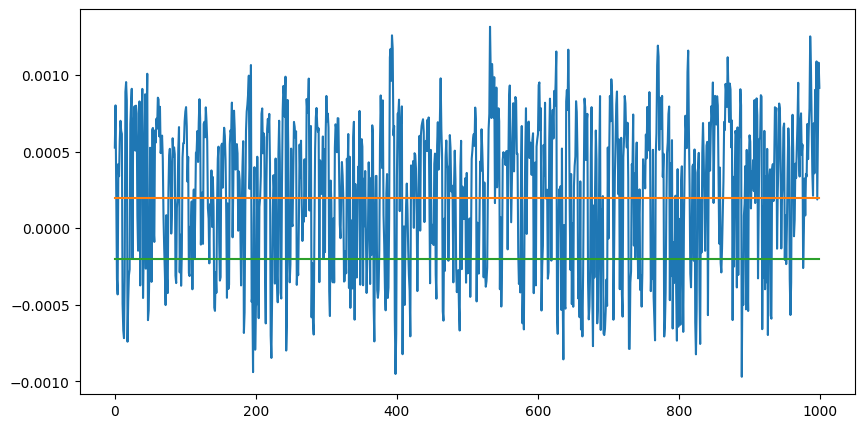

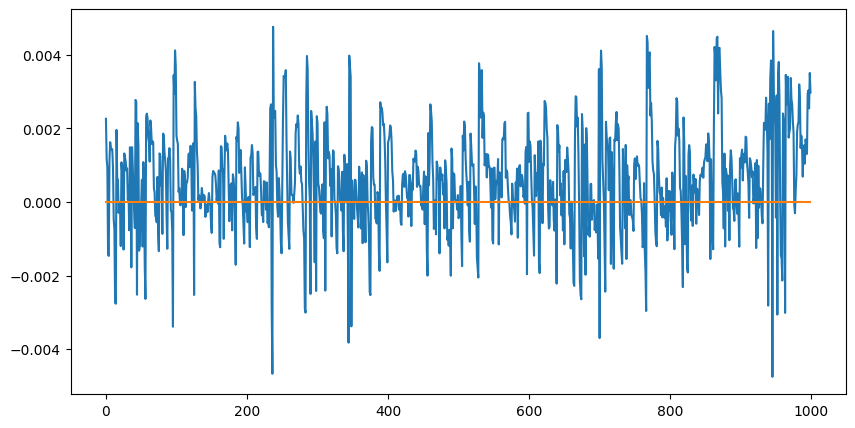

In [39]:
end = 1000
start = 0
pred = boost.predict(X_test[start:end])
p,q = 0.0002, 1
print((np.sign(pred.reshape(-1)[(abs(pred)>p) & (abs(pred) < q)]) == np.sign(y_test[start:end].reshape(-1)[(abs(pred)>p) & (abs(pred) < q)])).mean())
print("Long wr:", (np.sign(pred.reshape(-1)[((pred)>p) & ((pred) < q)]) == np.sign(y_test[start:end].reshape(-1)[((pred)>p) & ((pred) < q)])).mean())
print("Short wr:", (np.sign(pred.reshape(-1)[((pred)<-p) & ((pred) > -q)]) == np.sign(y_test[start:end].reshape(-1)[((pred)<-p) & ((pred) > -q)])).mean())
print("Part of such samples:", ((abs(pred)>p) & (abs(pred) < q)).mean())
plt.figure(figsize=(10,5))
plt.plot(range(end-start), (pred)*np.sign(y_test[start:end]))
plt.plot(range(end-start), [p]*(end-start))
plt.plot(range(end-start), [-p]*(end-start))
plt.show()
plt.figure(figsize=(10,5))
plt.plot(range(end-start), np.sign(pred)*(y_test[start:end]))
plt.plot(range(end-start), [0]*(end-start))

In [40]:
pred = boost.predict(X_val)
p,q = 0.0002, 1
print((np.sign(pred.reshape(-1)[(abs(pred)>p) & (abs(pred) < q)]) == np.sign(y_val.reshape(-1)[(abs(pred)>p) & (abs(pred) < q)])).mean())
print("Long wr:", (np.sign(pred.reshape(-1)[((pred)>p) & ((pred) < q)]) == np.sign(y_val.reshape(-1)[((pred)>p) & ((pred) < q)])).mean())
print("Short wr:", (np.sign(pred.reshape(-1)[((pred)<-p) & ((pred) > -q)]) == np.sign(y_val.reshape(-1)[((pred)<-p) & ((pred) > -q)])).mean())
print("Part of such samples:", ((abs(pred)>p) & (abs(pred) < q)).mean())

0.6838755304101839
Long wr: 0.7098515519568152
Short wr: 0.6552748885586924
Part of such samples: 0.8518072289156626


In [41]:
for i in range(20):
    pred = boost.predict(X_val)
    p,q = 0.00001*i, 1
    print((np.sign(pred.reshape(-1)[(abs(pred)>p) & (abs(pred) < q)]) == np.sign(y_val.reshape(-1)[(abs(pred)>p) & (abs(pred) < q)])).mean())
    print("Long wr:", (np.sign(pred.reshape(-1)[((pred)>p) & ((pred) < q)]) == np.sign(y_val.reshape(-1)[((pred)>p) & ((pred) < q)])).mean())
    print("Short wr:", (np.sign(pred.reshape(-1)[((pred)<-p) & ((pred) > -q)]) == np.sign(y_val.reshape(-1)[((pred)<-p) & ((pred) > -q)])).mean())
    print("Part of such samples:", ((abs(pred)>p) & (abs(pred) < q)).mean())

0.6536144578313253
Long wr: 0.6799544419134397
Short wr: 0.6240409207161125
Part of such samples: 1.0
0.6573511543134872
Long wr: 0.6827033218785796
Short wr: 0.628719275549806
Part of such samples: 0.9915662650602409
0.6587301587301587
Long wr: 0.684331797235023
Short wr: 0.6298701298701299
Part of such samples: 0.9867469879518073
0.6625615763546798
Long wr: 0.6883720930232559
Short wr: 0.6335078534031413
Part of such samples: 0.9783132530120482
0.6631448104412678
Long wr: 0.6889671361502347
Short wr: 0.6340819022457067
Part of such samples: 0.9692771084337349
0.6658307210031348
Long wr: 0.6923990498812351
Short wr: 0.6361221779548473
Part of such samples: 0.9608433734939759
0.6664556962025316
Long wr: 0.6925837320574163
Short wr: 0.6370967741935484
Part of such samples: 0.9518072289156626
0.6673027989821882
Long wr: 0.6930455635491607
Short wr: 0.6382113821138211
Part of such samples: 0.946987951807229
0.6670951156812339
Long wr: 0.6929611650485437
Short wr: 0.6379781420765027
Part o

In [54]:
long_list = []
short_list = []
long_list_w = []
short_list_w = []
for i in (range(0, y_test.shape[0]-10000, 100)):
    st, en = i, i+100
    p, q = 0.0001, 1
    pred = boost.predict(X_test[st:en])
    print((np.sign(pred.reshape(-1)[(abs(pred)>p) & (abs(pred) < q)]) == np.sign(y_test[st:en].reshape(-1)[(abs(pred)>p) & (abs(pred) < q)])).mean())
    print("Long wr:", (np.sign(pred.reshape(-1)[((pred)>p) & ((pred) < q)]) == np.sign(y_test[st:en].reshape(-1)[((pred)>p) & ((pred) < q)])).mean())
    print("Short wr:", (np.sign(pred.reshape(-1)[((pred)<-p) & ((pred) > -q)]) == np.sign(y_test[st:en].reshape(-1)[((pred)<-p) & ((pred) > -q)])).mean())
    print("Part of such samples:", ((abs(pred)>p) & (abs(pred) < q)).mean())
    print("stability:", (y_test[st:en]>0).mean())
    print( "If dogodalsya profit: ", y_test[st:en][(pred>p) & (y_test[st:en]>0)].sum(), " If dogodalsya profit: ", y_test[st:en][(pred<-p) & (y_test[st:en]<0)].sum())
    print("If proebalsya loss: ", y_test[st:en][(pred>p) & (y_test[st:en]<0)].sum(), " If proebalsya loss: ", y_test[st:en][(pred<-p) & (y_test[st:en]>0)].sum())
    long_list.append((np.sign(pred.reshape(-1)[((pred)>p) & ((pred) < q)]) == np.sign(y_test[st:en].reshape(-1)[((pred)>p) & ((pred) < q)])).sum())
    short_list.append((np.sign(pred.reshape(-1)[((pred)<-p) & ((pred) > -q)]) == np.sign(y_test[st:en].reshape(-1)[((pred)<-p) & ((pred) > -q)])).sum())
    short_list_w.append((((pred)<-p) & ((pred) > -q)).sum())
    long_list_w.append((((pred)>p) & ((pred) < q)).sum())

0.6739130434782609
Long wr: 0.6666666666666666
Short wr: 0.6792452830188679
Part of such samples: 0.92
stability: 0.44
If dogodalsya profit:  0.026785984194676038  If dogodalsya profit:  -0.06257532756428252
If proebalsya loss:  -0.014366176812342868  If proebalsya loss:  0.017591317776735726
0.735632183908046
Long wr: 0.8148148148148148
Short wr: 0.6060606060606061
Part of such samples: 0.87
stability: 0.63
If dogodalsya profit:  0.039911219269464615  If dogodalsya profit:  -0.02171278584327818
If proebalsya loss:  -0.006851724162257988  If proebalsya loss:  0.007035370460238166
0.6703296703296703
Long wr: 0.5526315789473685
Short wr: 0.7547169811320755
Part of such samples: 0.91
stability: 0.39
If dogodalsya profit:  0.022628769064808152  If dogodalsya profit:  -0.06226402067642711
If proebalsya loss:  -0.02379798415594403  If proebalsya loss:  0.008031770157386209
0.6022727272727273
Long wr: 0.5714285714285714
Short wr: 0.6304347826086957
Part of such samples: 0.88
stability: 0.45
I

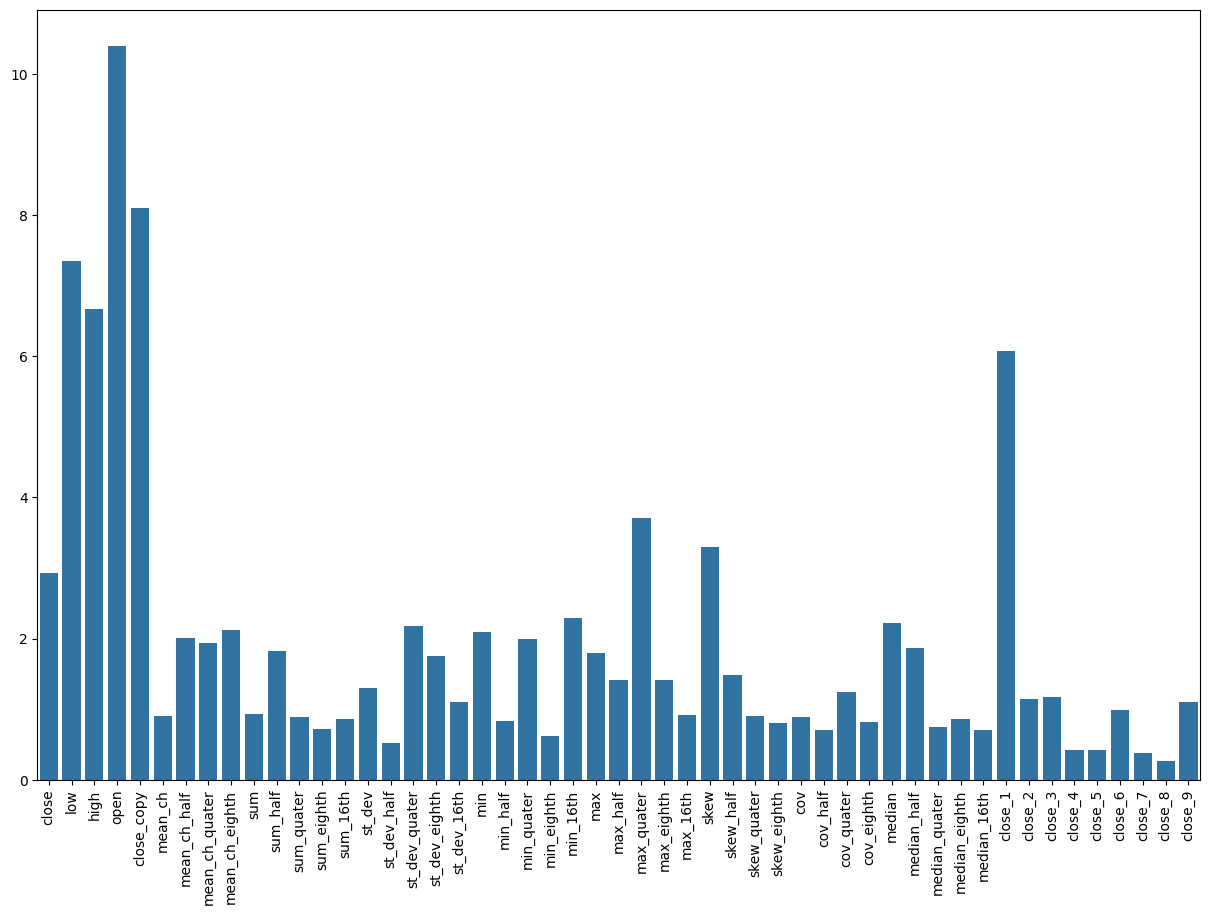

In [43]:
d = boost.feature_importances_
# d.sort()
# d = d[::-1]
plt.figure(figsize=(15,10))
sns.barplot(data=pd.Series(data=d,index=boost.feature_names_))
ticks = plt.xticks(rotation=90)
plt.show()

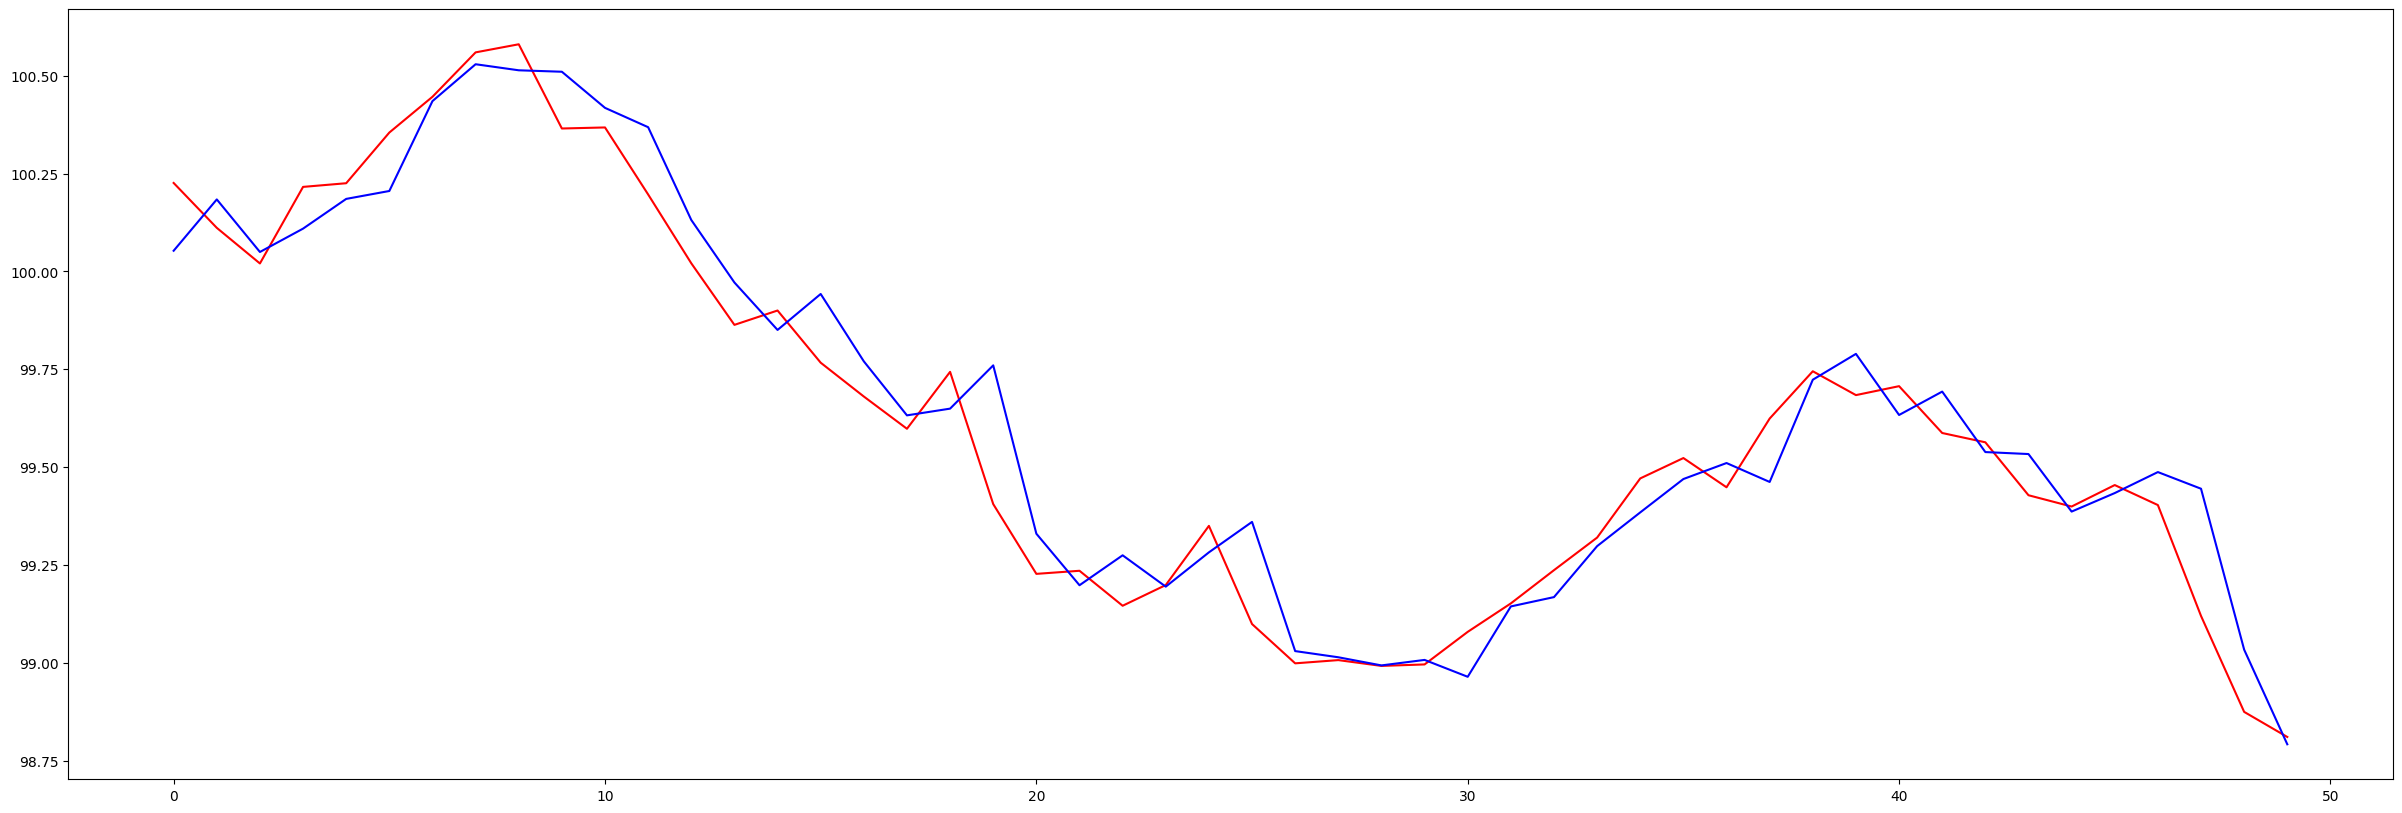

In [44]:
pred_ = boost.predict(X_test)
start_real = 100
start_pred = 100
real = []
pred = []
for i, prediction in enumerate(pred_):
    if i%5 == 0:
        start_pred = start_real*(prediction+1)
        start_real = start_real*(y_test[i]+1)
        real.append(start_real)
        pred.append(start_pred)
plt.figure(figsize=(30,10))
plt.plot(range(len(real[:50])), real[:50], color="red")
plt.plot(range(len(pred[:50])), pred[:50], color="blue")

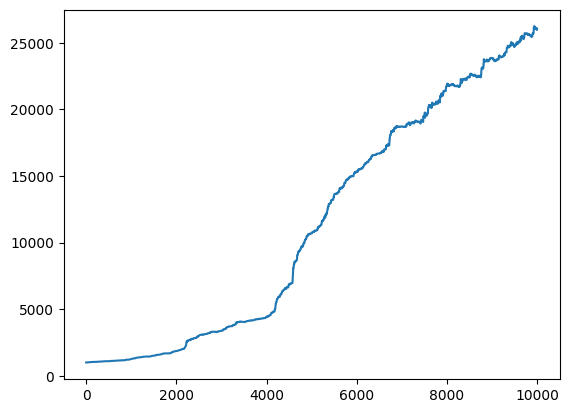

In [45]:
res_list = []
res = 1000
com = 0.0005
p = 0.0006
pred = boost.predict(X_test)
for i, prediction in enumerate(pred):
    if np.sign(prediction) == np.sign(y_test[i]) and abs(prediction) > p:
        res += res*(abs(y_test[i])-com)
    elif abs(prediction) > p and np.sign(prediction) != np.sign(y_test[i]):
        res -= res*(abs(y_test[i])+com)
    res_list.append(res)
plt.plot(range(len(res_list[0:10000])), res_list[0:10000])
plt.show()